In [116]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams ['figure.figsize'] =(12,8) #Adjust trhe confirguration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\entidixzem\Desktop\project\covid\movies.csv')

In [117]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [118]:
# Let's see uf there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [119]:
# Change missing data
# Change 'Unknown' to text data
object_cols = ['name', 'rating', 'genre', 'released', 'director', 'writer', 'star', 'country', 'company']
for col in object_cols:
    df[col] = df[col].fillna('Unknown')

# Change '0' to numeric data
numeric_cols = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
for col in numeric_cols:
    df[col] = df[col].fillna(0)

# Print again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
# print(df.isnull().sum())
# Save to a new file   
# df.to_csv('SaveNewFile.csv', index=False)

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [120]:
# Missing rows data
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [121]:
# Data type for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [122]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# Print again
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [123]:
# Create correct year column
df['yearcorrect'] = df['released'].astype(str).str.extract(r'(\d{4})')
# df['yearcorrect'] = df['yearcorrect'].astype('int64')
# Change to Int if yearcorrect contain NaN data
df['yearcorrect'] = pd.to_numeric(df['yearcorrect'], errors='coerce').astype('Int64')
# df.dtypes
# df.head()

In [124]:
# sorted_df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
# sorted_df.head()

In [125]:
# Print all rows (not recommend for large dataset)
pd.set_option('display.max_rows', None)

In [126]:
# Drop any duplicates
# df['company'].sort_values(ascending=False)
# df['company'] = df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [127]:
# Budget high correlation
# Company high correlation

In [128]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

Text(0, 0.5, 'Gross Earnings')

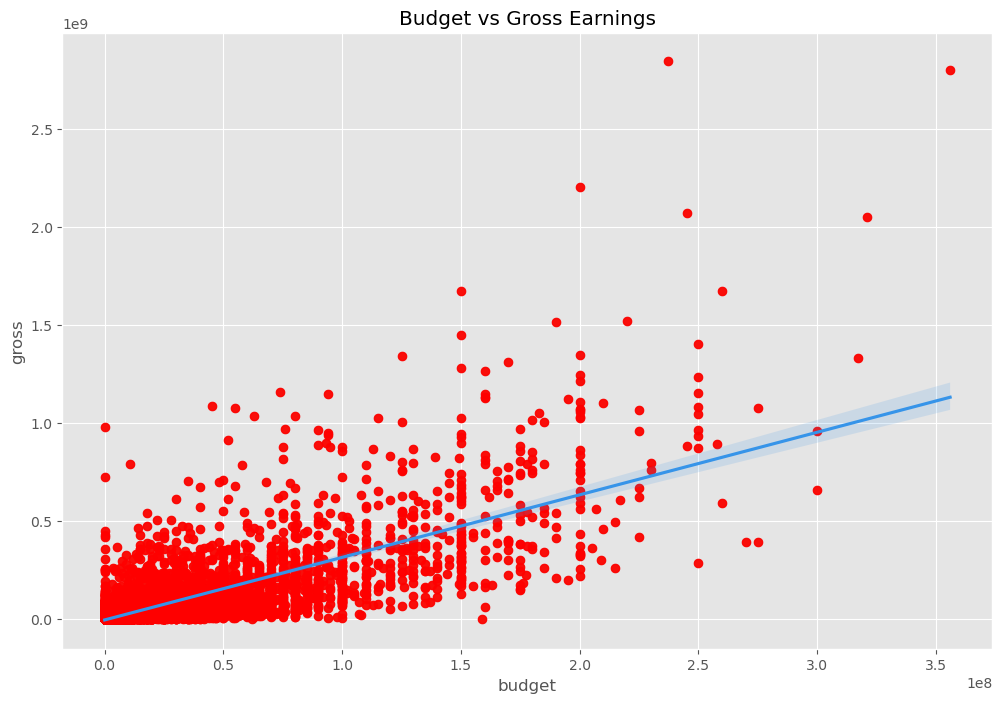

In [129]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "#3694E9"})
plt.show()

In [130]:
# Let's start looking at correlation
# Method pearson, kendall, spearman
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.corr(method='spearman')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805,0.997407
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868,0.106305
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359,0.461052
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941,0.278693
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478,0.300415
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000,0.142203
yearcorrect,0.997407,0.106305,0.461052,0.278693,0.300415,0.142203,1.000000


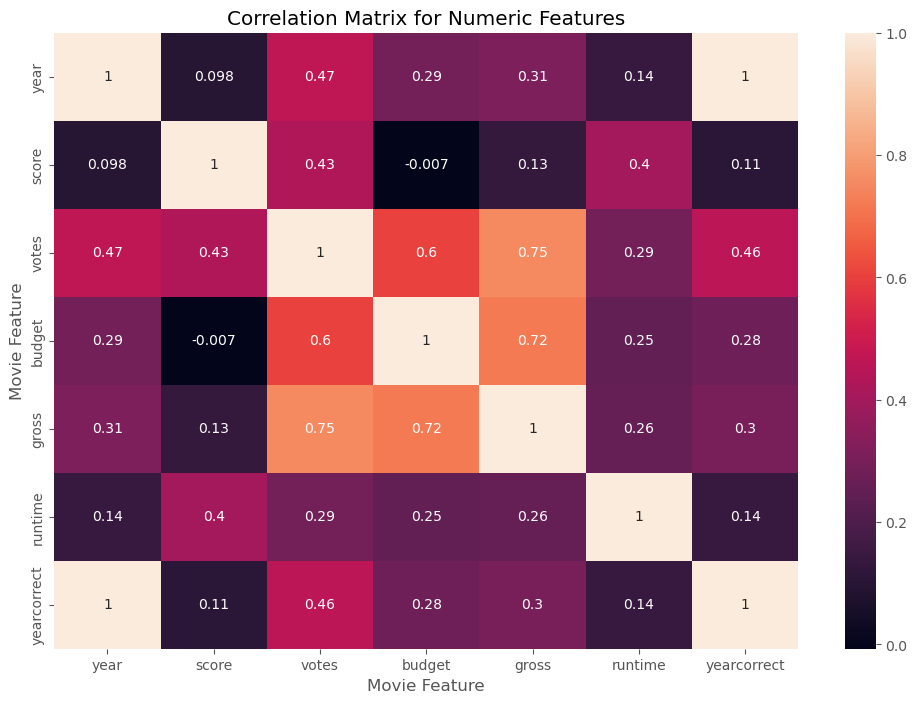

In [131]:
# High correlation between budget and gros
correlation_matrix = df_numeric.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [132]:
# look at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [133]:
# Change object column to category type -> to category code
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018


In [134]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018


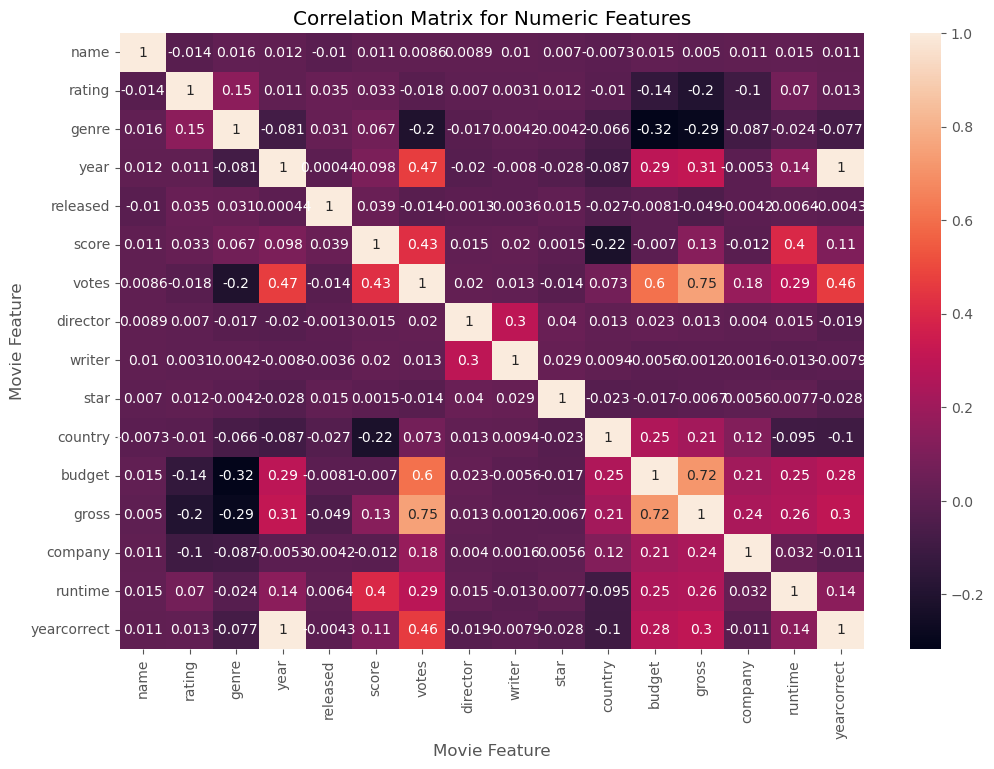

In [135]:
correlation_matrix = df_numerized.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [136]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.012206
      genre       0.016355
      year        0.011453
      released   -0.010480
dtype: float64

In [137]:
sorted_pairs = corr_pairs.sort_values(ascending=True)

sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
genre   gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145296
dtype: float64

In [138]:
higt_corr = sorted_pairs [(sorted_pairs) > 0.5]

higt_corr

gross        votes          0.632870
votes        gross          0.632870
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  year           0.997415
year         yearcorrect    0.997415
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [139]:
# Budget have the highest correlation to Gross Earnings

# End./